In [1]:
#--- Import Pandas ---
import pandas as pd
#--- Read in dataset(heart_cleveland_upload.csv) ----
df = pd.read_csv('heart_cleveland_upload.csv')

#--- Inspect data ---
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [2]:
 # Count the number of null values in each column and store in 'sumofnull'
sumofnull = df.isnull().sum()

# Display the result
sumofnull

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [3]:
datatype = df.dtypes

#--- Inspect data ---
datatype

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [5]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'condition']
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
lst = cat_features
df[lst] = df[lst].astype(object)
dtype= df.dtypes
dtype

age            int64
sex           object
cp            object
trestbps       int64
chol           int64
fbs           object
restecg       object
thalach        int64
exang         object
oldpeak      float64
slope         object
ca            object
thal          object
condition      int64
dtype: object

<Axes: >

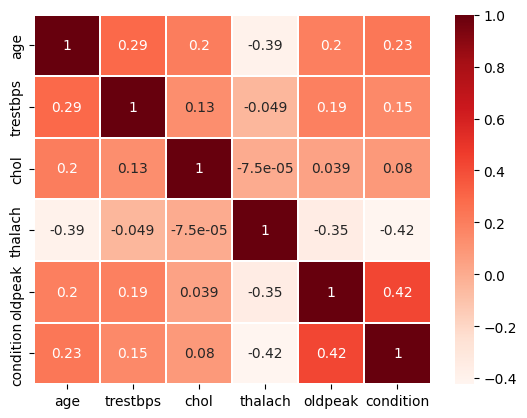

In [6]:
#--- Import matplotlib and  seaborn---
import seaborn as sns
import matplotlib.pyplot as plt

corr_data = df[numeric_features].corr()
sns.heatmap(corr_data, annot=True, cmap='Reds', linewidths=0.1)


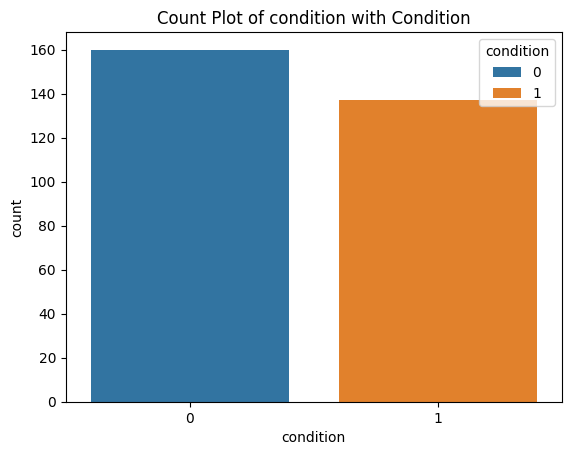

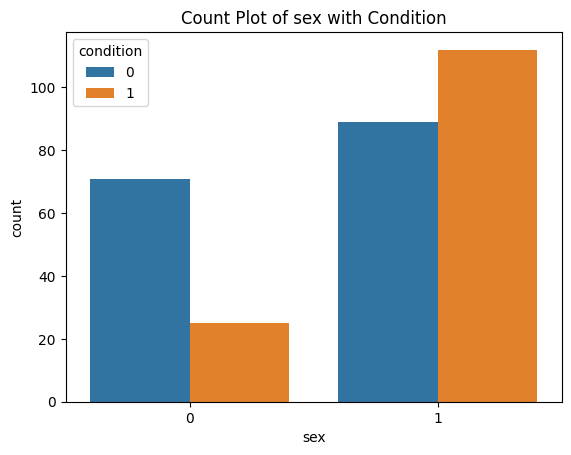

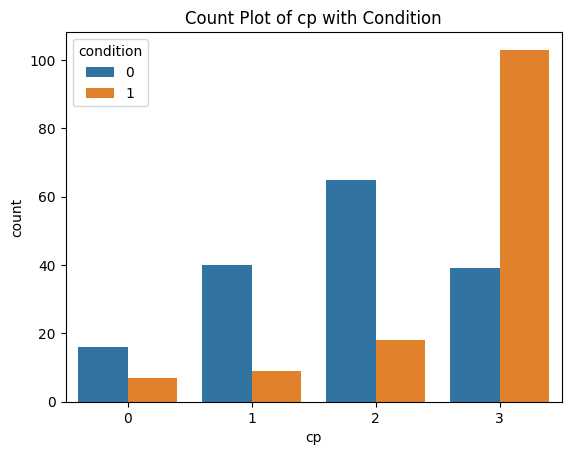

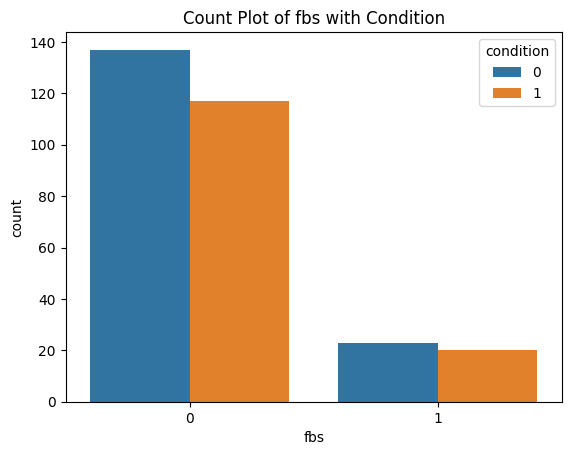

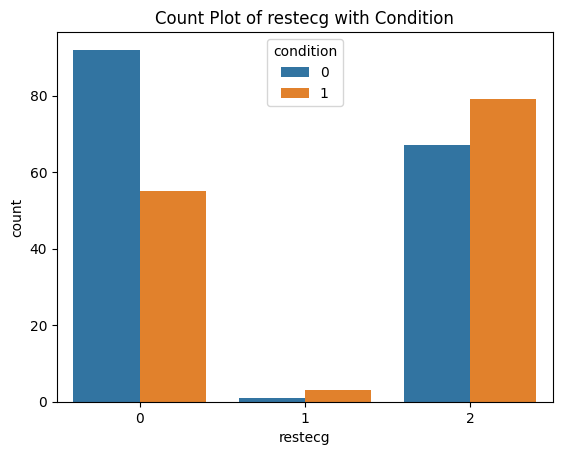

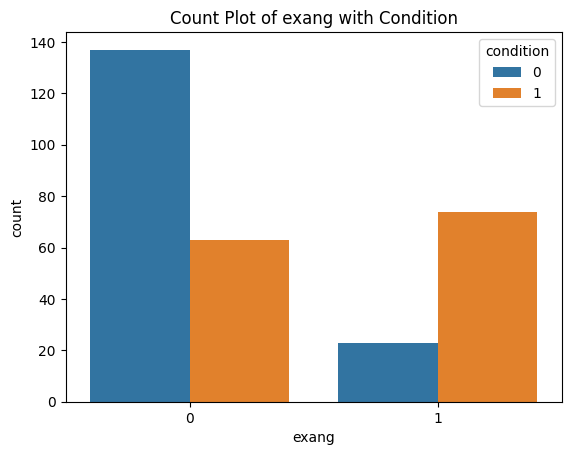

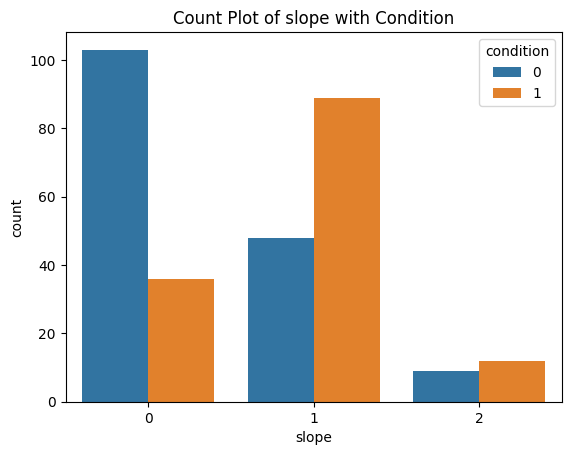

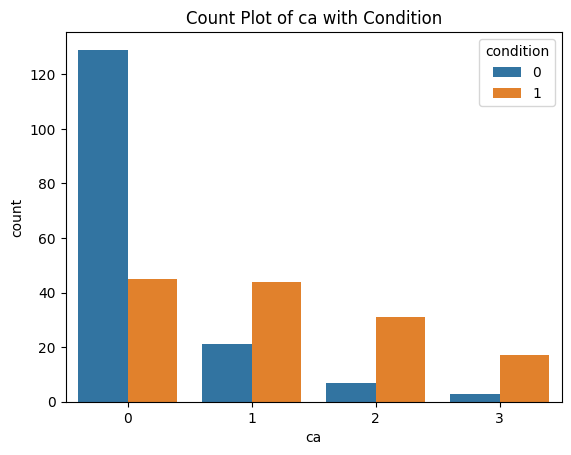

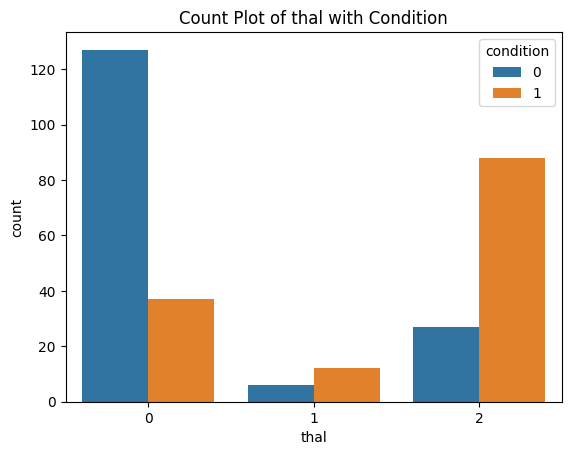

In [7]:
# List of columns to plot
columns = ["condition", "sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Loop through the columns and create count plots
for col in columns:
    sns.countplot(x=df[col], hue=df['condition'])
    plt.title(f'Count Plot of {col} with Condition')
    plt.show()

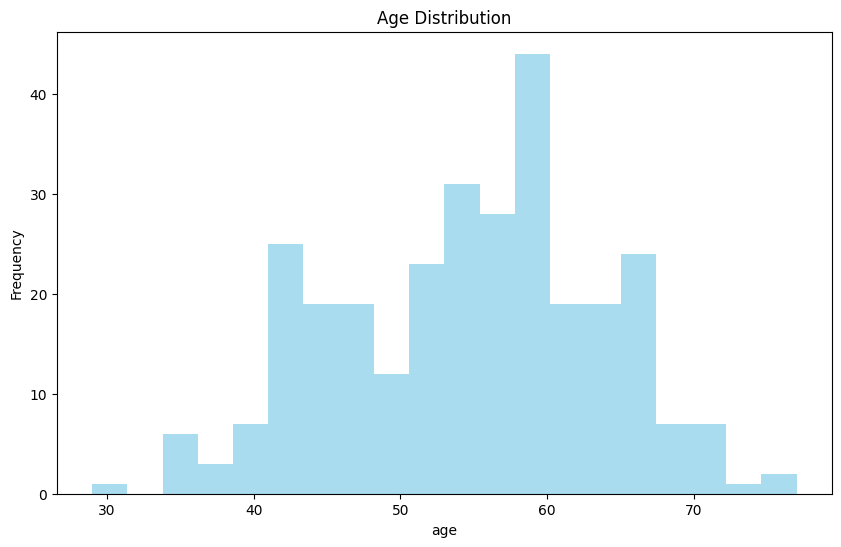

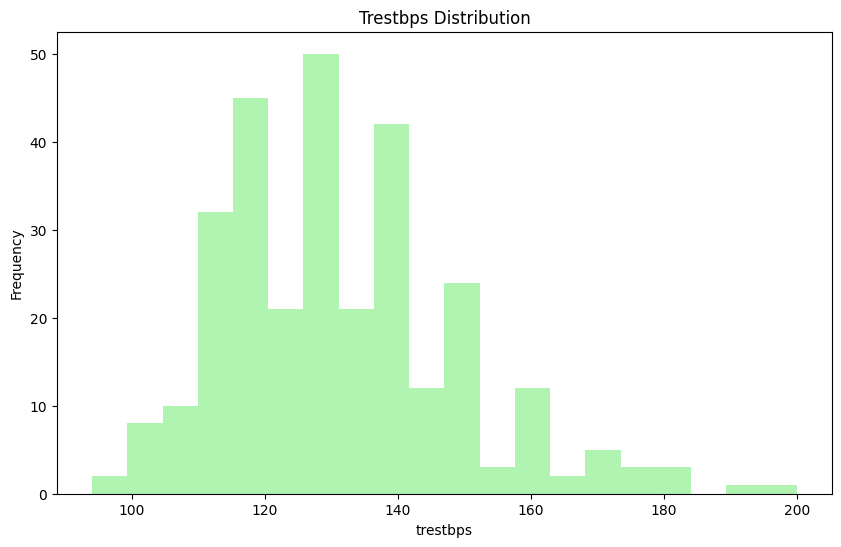

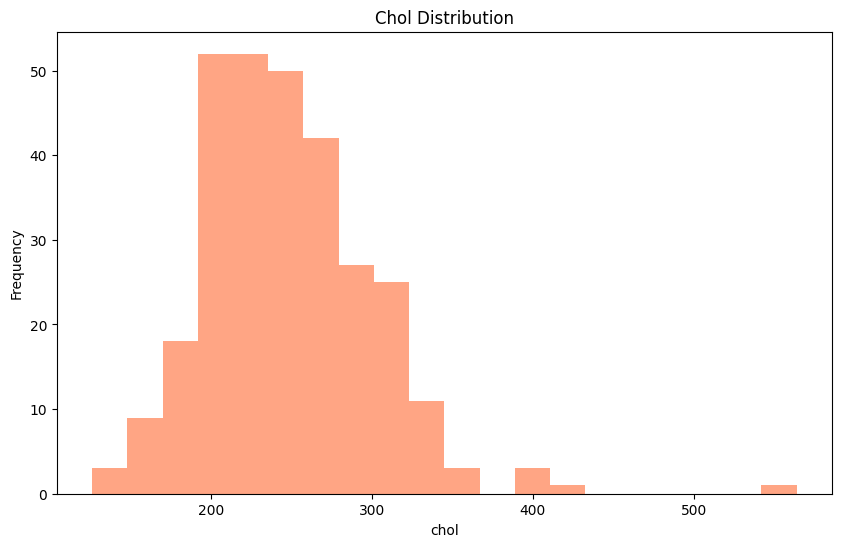

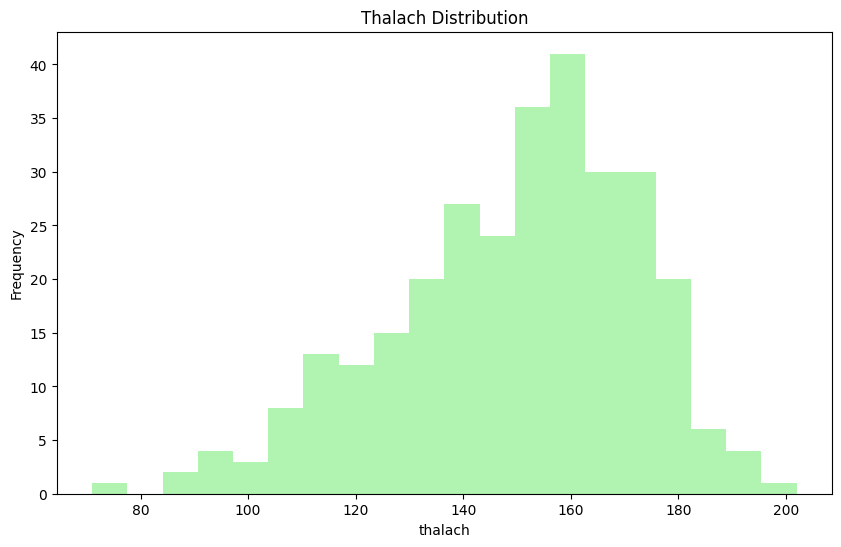

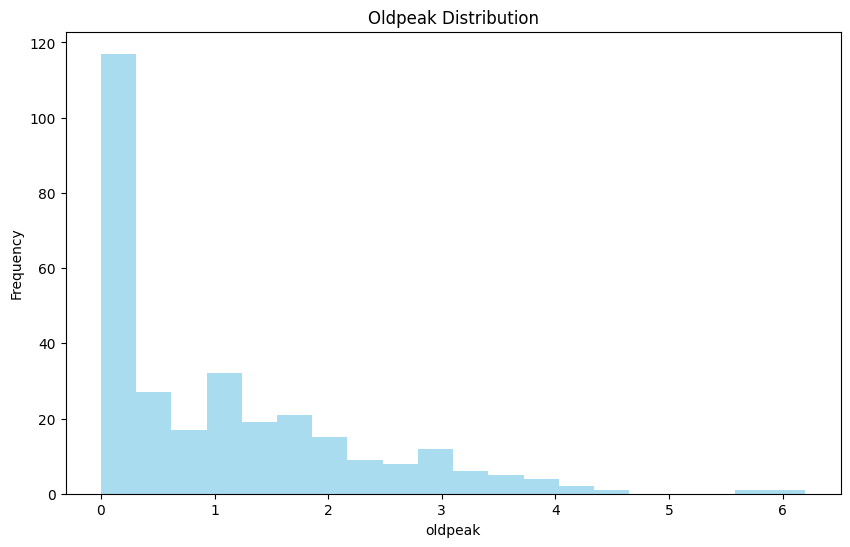

In [10]:
# List of columns to plot
columns = ['age', 'trestbps','chol','thalach','oldpeak']
colors = ['skyblue','lightgreen','coral','lightgreen','skyblue']  # Corresponding colors for each plot

# Loop through columns and create histograms
for col, color in zip(columns, colors):
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=20, color=color, alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col.capitalize()} Distribution')
    plt.show()


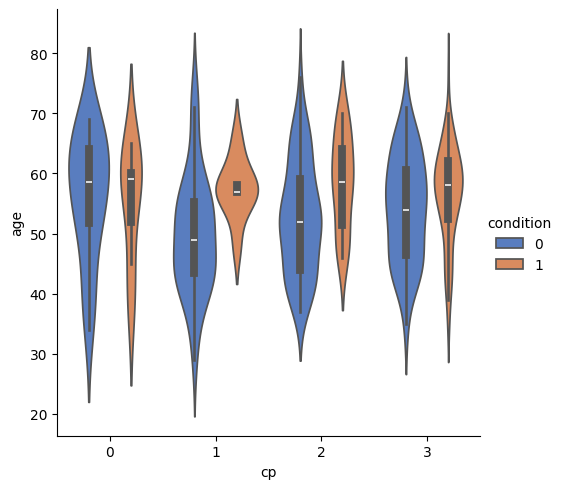

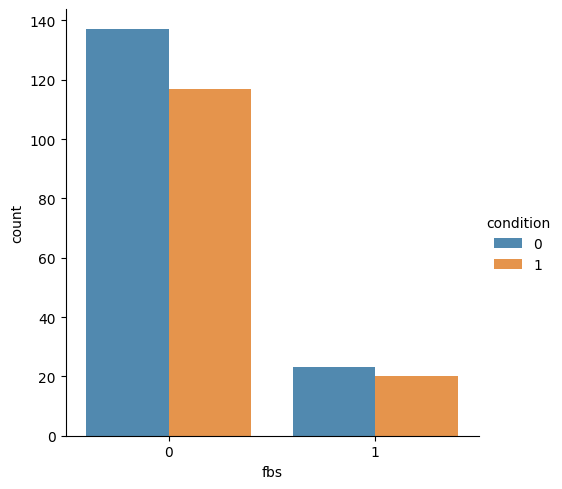

In [11]:
violinplt = sns.catplot(x='cp', y='age', hue='condition',data=df,kind="violin",palette = "muted")
countplt = sns.catplot(x='fbs', hue='condition', kind='count', data=df, alpha=0.85)


In [12]:
categorical_cols = ['cp','thal','slope']
for col in categorical_cols:
        df[col] = df[col].astype(int)
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_')
df_encoded = df_encoded.astype(int)

df_encoded

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,slope_0,slope_1,slope_2
0,69,1,160,234,1,2,131,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,69,0,140,239,0,0,151,0,1,2,...,1,0,0,0,1,0,0,1,0,0
2,66,0,150,226,0,0,114,0,2,0,...,1,0,0,0,1,0,0,0,0,1
3,65,1,138,282,1,2,174,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4,64,1,110,211,0,2,144,1,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,152,223,0,0,181,0,0,0,...,0,0,0,1,0,0,1,1,0,0
293,39,1,118,219,0,0,140,0,1,0,...,0,0,0,1,0,0,1,0,1,0
294,35,1,120,198,0,0,130,1,1,0,...,0,0,0,1,0,0,1,0,1,0
295,35,0,138,183,0,0,182,0,1,0,...,0,0,0,1,1,0,0,1,0,0


In [13]:
x = df_encoded.drop(['condition'], axis=1)
y = df_encoded['condition']

In [14]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x

array([[0.83333333, 1.        , 0.62264151, ..., 0.        , 1.        ,
        0.        ],
       [0.83333333, 0.        , 0.43396226, ..., 1.        , 0.        ,
        0.        ],
       [0.77083333, 0.        , 0.52830189, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.125     , 1.        , 0.24528302, ..., 0.        , 1.        ,
        0.        ],
       [0.125     , 0.        , 0.41509434, ..., 1.        , 0.        ,
        0.        ],
       [0.125     , 1.        , 0.30188679, ..., 1.        , 0.        ,
        0.        ]], shape=(297, 20))

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(x, y,train_size=0.8,test_size=0.2, random_state=4)

X_train


array([[0.47916667, 1.        , 0.54716981, ..., 0.        , 1.        ,
        0.        ],
       [0.66666667, 1.        , 0.52830189, ..., 0.        , 1.        ,
        0.        ],
       [0.79166667, 1.        , 0.62264151, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.66666667, 1.        , 0.50943396, ..., 1.        , 0.        ,
        0.        ],
       [0.72916667, 1.        , 0.24528302, ..., 0.        , 0.        ,
        1.        ],
       [0.45833333, 0.        , 0.33962264, ..., 1.        , 0.        ,
        0.        ]], shape=(237, 20))

In [16]:
#--- Import LogisticRegression ---
#--- Import cross_val_score from sklearn.model_selection ---

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_cv_results = cross_val_score(lr_model, X_train, Y_train, cv=10)
lr_mean_score = round(lr_cv_results.mean(), 4)

lr_mean_score

np.float64(0.8268)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldr_model = LinearDiscriminantAnalysis()
ldr_model.fit(X_train, Y_train)
ldr_cv_results = cross_val_score(ldr_model, X_train, Y_train, cv=10)
ldr_mean_score = round(ldr_cv_results.mean(), 4)
ldr_mean_score


np.float64(0.8266)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_cv_results = cross_val_score(knn_model, X_train, Y_train, cv=10)
knn_mean_score = round(knn_cv_results.mean(), 4)
knn_mean_score


In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_cv_results = cross_val_score(dt_model, X_train, Y_train, cv=10)
dt_mean_score = round(dt_cv_results.mean(), 4)

dt_mean_score


np.float64(0.7132)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)
gnb_cv_results = cross_val_score(gnb_model, X_train, Y_train, cv=10)
gnb_mean_score = round(gnb_cv_results.mean(), 4)
gnb_std_score = round(gnb_cv_results.std(), 4)
gnb_mean_score


np.float64(0.852)

In [20]:
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
rf_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
rf_model.fit(X_train, Y_train)
rf_cv_results = cross_val_score(rf_model, X_train, Y_train, cv=10)
rf_mean_score = round(rf_cv_results.mean(), 4)
rf_mean_score

np.float64(0.8138)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

sv_model = SVC()
sv_model.fit(X_train, Y_train)
sv_cv_results = cross_val_score(sv_model, X_train, Y_train, cv=10)
sv_mean_score = round(sv_cv_results.mean(), 4)
sv_mean_score

np.float64(0.8183)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = gnb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)
cr = classification_report(Y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)


Accuracy: 0.77

Confusion Matrix:
[[28  5]
 [ 9 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.78      0.67      0.72        27

    accuracy                           0.77        60
   macro avg       0.77      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



In [25]:
import numpy as np

# Ensure the input data is a NumPy array and matches the model's input format
data = np.array([[0.254, 1, 0.487, 0.362,  # age_scaled, sex, trestbps_scaled, chol
                  1, 0.5, 0.641, 1,  # fbs, restecg_scaled, thalach_scaled, exang
                  0.672, 0.863, 0, 0,  # oldpeak_scaled, ca_scaled, cp_0, cp_1
                  0, 1, 0, 0,  # cp_2, cp_3, thal_0, thal_1
                  0, 1, 0, 1]])  # thal_2, thal_3, slope_0, slope_1, slope_2

# Make predictions using the trained model
prediction = gnb_model.predict(data)

# Output the prediction
print("Prediction:", prediction)


Prediction: [1]
